# Fetch dataset annotations

This notebook illustrates how to access all the information about a dataset that is visible on the [METASPACE](https://metaspace2020.eu) platform.

This requires us to:

1. Connect to the sm server
2. Select a dataset
3. Access from the dataset:
    1. Annotations (and their potential metabolites)
	2. Ion images
	3. Optical image

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Connect to the sm server
The main metaspace2020.eu is configured by default.


In [12]:
from metaspace import SMInstance
sm = SMInstance()


SMInstance(https://metaspace2020.eu/graphql)

### Enter your API Key (only required for private datasets)

To access private datasets on METASPACE, generate an API key from your [account page](https://metaspace2020.eu/user/me) and enter it when prompted below.
This step can be skipped for accessing public datasets.

In [ ]:
# This will prompt you to enter your API key if needed and it will save it to a config file.
# Note that API keys should be kept secret like passwords.
sm.save_login()

## Choose a dataset to visualise
First, we need to select a dataset to visualise. I've chosen one of the [mouse brain sections](http://metaspace2020.eu/#/annotations?ds=2016-09-22_11h16m17s&sort=-msm) from the [publication](https://www.nature.com/articles/nmeth.4072).

Whilst the API does support access by dataset name, it's most reliable to query using the dataset id. A quick hack to grab this through the web app is to filter the dataset then check the url:

![Imgur](https://i.imgur.com/KuAjPML.png)

The id for the selected dataset(s) can be copied from here
e.g.

ht&#8203;tp\.://metaspace2020.eu/#/annotations?ds=**2016-09-22_11h16m17s**&sort=-msm


In [13]:
dsid = "2016-09-22_11h16m17s"
ds = sm.dataset(id=dsid)
ds

SMDataset(Brain01_Bregma-1-46_centroid | ID: 2016-09-22_11h16m17s)

Get a list of the molecular databases used for the dataset annotation.

In [14]:
ds.database_details

[{'id': 4,
  'name': 'SwissLipids',
  'version': '2016',
  'isPublic': True,
  'archived': True},
 {'id': 22,
  'name': 'HMDB',
  'version': 'v4',
  'isPublic': True,
  'archived': False}]

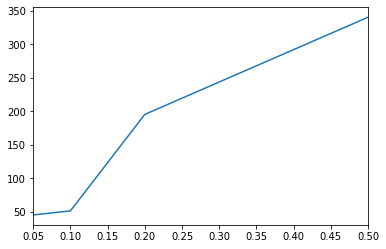

,,msm
formula,adduct,
C40H80NO8P,+K,0.991456
C43H76NO7P,+Na,0.987877
C42H84NO8P,+K,0.987600
C37H71O8P,+K,0.987128
C44H86NO8P,+K,0.976368


In [20]:
# All results
results = ds.results(database=("HMDB", "v4"))
results.fdr.value_counts().sort_index().cumsum().plot()
plt.show()
# Annotations at 10% FDR
fdr = 0.1
annotations = results[results.fdr <= fdr][['msm']]
annotations.head()

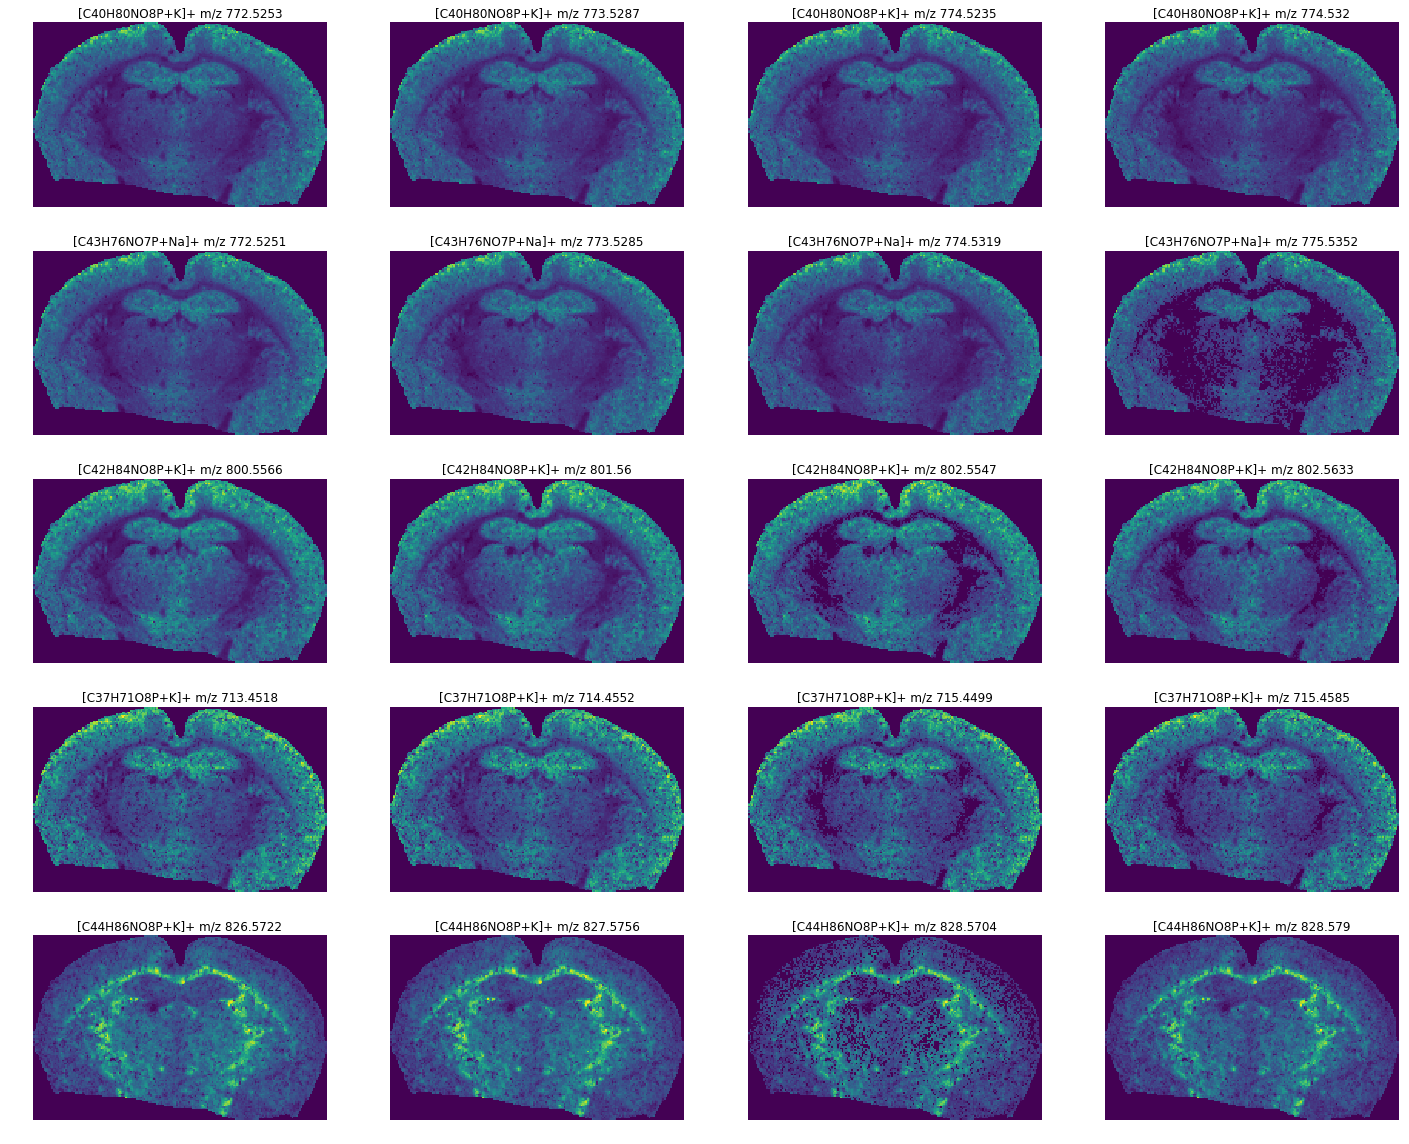

In [5]:
limit = 5 # number of annotations to get
plt.figure(figsize=(20, 16))
for ii in range(limit):
    row = results.iloc[ii]
    (sf, adduct) = row.name
    images = ds.isotope_images(sf, adduct)
    for j, im in enumerate(images):
        ax = plt.subplot(limit, 4, ii * 4 + j + 1)
        ax.axis('off')
        plt.title("[{}{}]+ m/z {}".format(sf, adduct, images.peak(index=j)))
        plt.imshow(images[j], cmap='viridis')
plt.tight_layout()
plt.show()

## Overlay an ion image on the optical

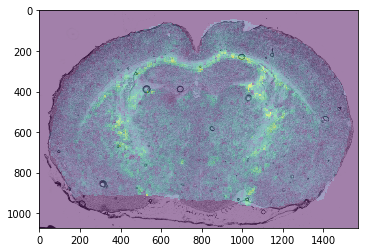

In [6]:
oi = ds.optical_images()
plt.figure()
plt.imshow(oi[0])
plt.imshow(
    np.asarray(
        oi.ion_image_to_optical(images[j])
    ).sum(axis=2), 
    cmap='viridis', alpha=0.5)
plt.show()